<a href="https://colab.research.google.com/github/priyanka2591/thesis/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <p style = "text-align:center"><font color  = 'blue'> Thesis Dissertation - Masters

#### Importing libraries

In [2]:
pip install pycaret

     |████████████████████████████████| 266kB 3.1MB/s 
     |████████████████████████████████| 2.0MB 15.6MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 14.2MB 20.8MB/s 
     |████████████████████████████████| 276kB 39.9MB/s 
     |████████████████████████████████| 112kB 45.1MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 1.4MB 47.5MB/s 
     |████████████████████████████████| 174kB 48.3MB/s 
     |████████████████████████████████| 6.8MB 43.5MB/s 
     |████████████████████████████████| 1.7MB 44.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 256kB 37.5MB/s 
     |████████████████████████████████| 153kB 48.1MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 

In [3]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from skimage import io
import pathlib
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

%load_ext tensorboard
warnings.filterwarnings("ignore")

#### Reading the tabular data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [6]:
f = open("tabular_data.csv", "r")
# f = open("D:\Data Science\Thesis\1. Datasets\Thesis 1\SLOAN")
a = f.readlines()
f.close()

##### Reading the first record of the csv file

In [7]:
print(len(a))
a[1001]

1002


'1237648704055214227,217.618134232202,-0.23442684979355,19.51428,18.67359,18.61282,18.63047,18.35689,752,301,3,495,19.00783,4535127118091407360,QSO,2.62735,4028,55621,8\n'

#### Creating a pandas dataframe for analysis

In [8]:
df = pd.read_csv("tabular_data.csv", skiprows = [0])
df.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,fiberMag_g,specobjid,class,redshift,plate,mjd,fiberid
0,1237646587699462283,56.485796,0.843531,17.98595,16.77582,16.22950,16.00589,15.89195,259,301,5,333,17.10288,1837638847656126464,STAR,0.000125,1632,52996,619
1,1237646587699658835,56.901894,0.845330,19.23049,17.21716,16.38172,16.05841,15.88405,259,301,5,336,17.54239,1721609858370791424,STAR,-0.000201,1529,52930,396
2,1237646587709882380,80.224783,0.834251,18.12716,16.95737,16.40913,16.18926,16.05978,259,301,5,492,17.26884,8175272584063242240,STAR,-0.000017,7261,56603,412


In [9]:
df['class'].value_counts()

STAR      498
GALAXY    440
QSO        62
Name: class, dtype: int64

In [10]:
classes = ['GALAXY', 'STAR', 'QSO']

In [11]:
columns = ['u', 'g', 'r', 'i', 'z', 'fiberMag_g', 'class']
df1 = df[columns]
df1.head(3)

,u,g,r,i,z,fiberMag_g,class
0,17.98595,16.77582,16.22950,16.00589,15.89195,17.10288,STAR
1,19.23049,17.21716,16.38172,16.05841,15.88405,17.54239,STAR
2,18.12716,16.95737,16.40913,16.18926,16.05978,17.26884,STAR


#### <font color = "blue"> Univariate analysis

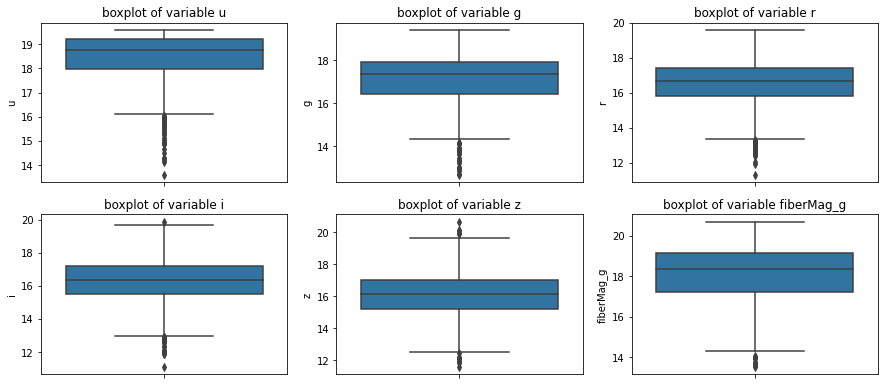

In [12]:
plt.figure(figsize = (15,10))
for i in range(1, len (df1.columns)):
    plt.subplot(3,3,i)
    sns.boxplot(y = df1[df1.columns[i-1]])
    plt.title('boxplot of variable ' + df1.columns[i-1])
plt.show()

   <font color = 'blue'>
    1.Outliers are present in all the variables present here <br>
    2. Elimination of outliers needs to be done during data preparation stage

 

##### Dsitribution of target variable

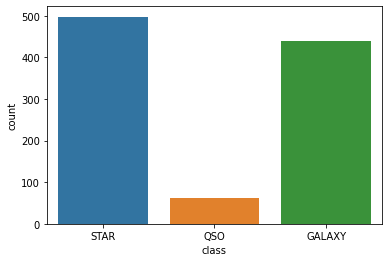

In [13]:
sns.countplot(x = df1['class'])

#### <font color = "blue"> Bivariate analysis

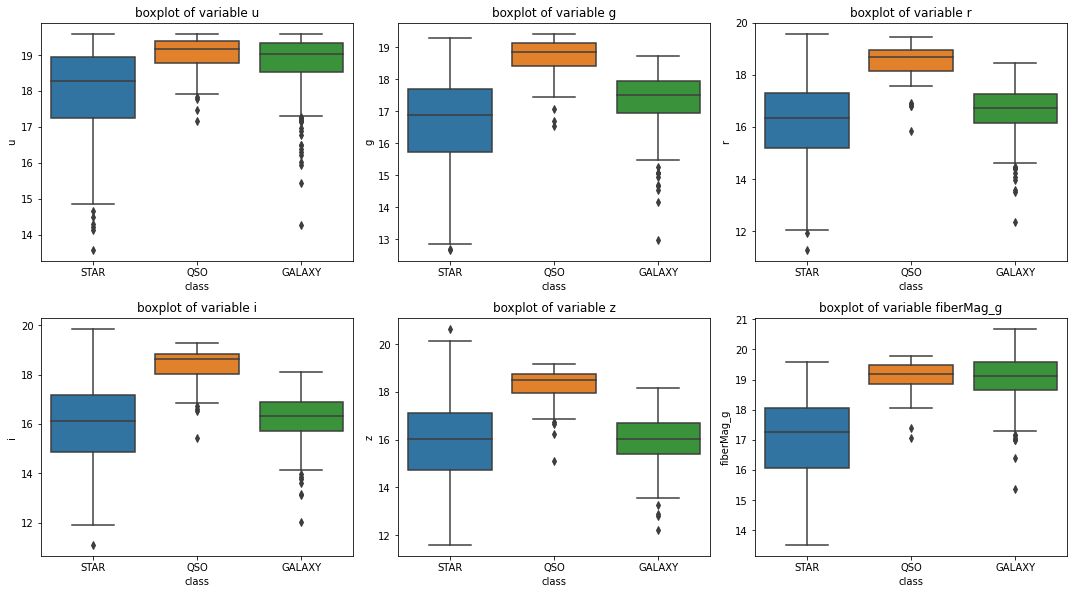

In [14]:
plt.figure(figsize = (15,12))
for i in range(1, len (df1.columns)):
    plt.subplot(3,3,i)
    sns.boxplot(y = df1[df1.columns[i-1]], x = df1['class'])
    plt.title('boxplot of variable ' + df1.columns[i-1])
    plt.tight_layout(pad=1)
plt.show()

##### Correlation matrix

In [15]:
df1.corr()

,u,g,r,i,z,fiberMag_g
u,1.000000,0.882630,0.761892,0.698621,0.646904,0.807580
g,0.882630,1.000000,0.953533,0.921637,0.899306,0.832784
r,0.761892,0.953533,1.000000,0.982368,0.964247,0.763866
i,0.698621,0.921637,0.982368,1.000000,0.986483,0.712715
z,0.646904,0.899306,0.964247,0.986483,1.000000,0.665402
fiberMag_g,0.807580,0.832784,0.763866,0.712715,0.665402,1.000000


##### Visualizing the heat map

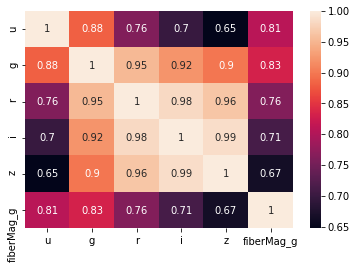

In [16]:
sns.heatmap(df1.corr(), annot = True)
plt.show()

#### Data preprocessing

In [17]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [18]:
df1.head()

,u,g,r,i,z,fiberMag_g,class
0,17.98595,16.77582,16.22950,16.00589,15.89195,17.10288,STAR
1,19.23049,17.21716,16.38172,16.05841,15.88405,17.54239,STAR
2,18.12716,16.95737,16.40913,16.18926,16.05978,17.26884,STAR
3,18.35316,17.11153,16.61320,16.39966,16.27895,17.42352,STAR
4,18.35388,17.29353,16.86982,16.69375,16.61706,17.61114,STAR


In [19]:
df2 = df1.copy() # for later use

In [19]:
df1['class'] = df1['class'].map({'GALAXY':0, 'QSO':1, 'STAR':2})

#### Splitting into train and test dataset

In [20]:
X = df1.drop(columns = ['class'])
y = df1.pop('class')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 6)
(700,)
(300, 6)
(300,)


In [23]:
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
y_train = tf.one_hot(y_train, depth = 3)
y_test = tf.one_hot(y_test, depth = 3)
print(X_train.shape)
print(y_train.shape)

(700, 6)
(700, 3)


#### Building a callback

In [25]:
model_name_ann = 'sloan_ann' +'/'    
if not os.path.exists(model_name_ann):
    os.mkdir(model_name_ann)        
filepath_ann = model_name_ann + 'model-{epoch:05d}-{loss:.2f}-{accuracy:.4f}-{val_loss:.2f}-{val_accuracy:.4f}.h5'
model_checkpoint_callback_ann = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath_ann,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True,
    verbose = 1
    )
callbacks_ann = [model_checkpoint_callback_ann]

#### Model building

##### Building a sequential  model

In [31]:
model  = Sequential()

model.add(Dense(50,input_dim  = 6, activation  = 'relu'))
model.add(Dense(100, activation  = 'relu'))
model.add(Dense(150, activation  = 'relu'))
model.add(Dense(3, activation  = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                350       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 453       
Total params: 21,053
Trainable params: 21,053
Non-trainable params: 0
_________________________________________________________________


##### ANN model without weights

In [34]:
model.fit(X_train, y_train, epochs = 250, batch_size=8,validation_data = (X_test, y_test), callbacks=callbacks_ann)

Epoch 1/250
88/88 [==============================] - 2s 4ms/step - loss: 0.9118 - accuracy: 0.4957 - val_loss: 0.8730 - val_accuracy: 0.4933

Epoch 00001: val_accuracy improved from -inf to 0.49333, saving model to sloan_ann/model-00001-0.91-0.4957-0.87-0.4933.h5
Epoch 2/250
88/88 [==============================] - 0s 3ms/step - loss: 0.8897 - accuracy: 0.4886 - val_loss: 0.8628 - val_accuracy: 0.4933

Epoch 00002: val_accuracy did not improve from 0.49333
Epoch 3/250
88/88 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.5143 - val_loss: 0.8568 - val_accuracy: 0.8633

Epoch 00003: val_accuracy improved from 0.49333 to 0.86333, saving model to sloan_ann/model-00003-0.88-0.5143-0.86-0.8633.h5
Epoch 4/250
88/88 [==============================] - 0s 2ms/step - loss: 0.8746 - accuracy: 0.5500 - val_loss: 0.8453 - val_accuracy: 0.8733

Epoch 00004: val_accuracy improved from 0.86333 to 0.87333, saving model to sloan_ann/model-00004-0.87-0.5500-0.85-0.8733.h5
Epoch

In [35]:
my_ann_model = load_model('./sloan_ann/model-00075-0.20-0.9400-0.18-0.9733.h5')
prediction_classes = np.array([])
true_classes = np.array([])
prediction_classes = np.concatenate([prediction_classes,np.argmax(my_ann_model.predict(X_test), axis = -1)])
true_classes = np.concatenate([true_classes, np.argmax(y_test.numpy(), axis=-1)])

##### evaluating model

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(prediction_classes, true_classes))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       138
         1.0       0.82      1.00      0.90        14
         2.0       0.98      0.98      0.98       148

    accuracy                           0.97       300
   macro avg       0.93      0.98      0.95       300
weighted avg       0.97      0.97      0.97       300



In [39]:
my_ann_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9733


[0.17949095368385315, 0.9733333587646484]

##### Checking for pycaret classification

In [20]:
df2.head(3)

,u,g,r,i,z,fiberMag_g,class
0,17.98595,16.77582,16.22950,16.00589,15.89195,17.10288,STAR
1,19.23049,17.21716,16.38172,16.05841,15.88405,17.54239,STAR
2,18.12716,16.95737,16.40913,16.18926,16.05978,17.26884,STAR


In [21]:
from pycaret.classification import *
k = setup(data = df2, target = 'class')
# return best model
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9671,0.9913,0.9120,0.9693,0.9667,0.9398,0.9410,0.278
lightgbm,Light Gradient Boosting Machine,0.9642,0.9913,0.9047,0.9660,0.9637,0.9348,0.9360,0.143
knn,K Neighbors Classifier,0.9599,0.9852,0.9274,0.9630,0.9602,0.9273,0.9285,0.072
lda,Linear Discriminant Analysis,0.9599,0.9854,0.9284,0.9633,0.9600,0.9269,0.9289,0.013
qda,Quadratic Discriminant Analysis,0.9585,0.9875,0.9139,0.9592,0.9581,0.9243,0.9248,0.013
rf,Random Forest Classifier,0.9557,0.9892,0.8984,0.9580,0.9555,0.9194,0.9205,0.314
gbc,Gradient Boosting Classifier,0.9543,0.9889,0.8734,0.9564,0.9536,0.9166,0.9179,0.245
lr,Logistic Regression,0.9542,0.9873,0.8628,0.9539,0.9522,0.9161,0.9175,0.406
dt,Decision Tree Classifier,0.9370,0.9483,0.8744,0.9395,0.9366,0.8863,0.8880,0.012
ridge,Ridge Classifier,0.9227,0.0000,0.6897,0.8930,0.9030,0.8539,0.8615,0.011


#### Data analysis using individuak algorithms  - to be done at the time of analysis

##### Logistic regression model

##### Random Forest Model

##### Adaboost model

##### Decision Tree model